# A4. Deep Learning 

The aim of this assignment is to develop and evaluate a deep learning model for predicting health-related risk ("RISK" variable) using the provided dataset. Students will explore how architectural choices—particularly the number of hidden layers and the number of nodes in those hidden layers—impact model performance. Through iterative experimentation and evaluation, students will deepen their understanding of neural network design and learn how to optimize predictive models for real-world health data. This assignment emphasizes hands-on skill development in model tuning, performance assessment, and critical analysis of modeling outcomes within the context of health informatics. The ultimate goal is to create the best model with the highest accuracy. <br>
The first step is to open the data file.

In [1]:
# The following statement will install pandas library. You may need to use pip instead of pip3
# !pip3 install pandas

## import necessary modules
import pandas as pd

data = pd.read_csv(
    filepath_or_buffer= "data/a4_data.csv", # For Windows, use "\\" instead of "/"
    sep = ",", # comma separated file
    header = 0, # field names in the first line. Index starts with 0 in Python
    encoding = "utf-8", # encoding 
    #parse_dates = [1,33] # If there is any date field, put index (indices) of the field(s)
)


## print first 5 lines. If you need more lines, put the number of lines as an argument
## of the head function
print(data.head(10)) 
print()
print(data.shape) ## show the number of rows and columns

   ADAPPT42  ADHECR42  AGE09X  BMINDX  FAMINC09  ASPIRIN  No_ASPIRIN  RISK
0         3        10    28.0    26.6    121000        0           1     0
1         6        10    79.0    34.3     49570        1           0     1
2         1         8    41.0    31.7    248131        0           1     0
3         5        10    69.0    25.3     11000        0           1     1
4         4        10    50.0    28.3     41965        0           1     1
5         5         5    38.0    28.8     44525        0           1     0
6         6        10    48.0    39.1     13200        1           0     1
7         2         8    25.0    35.2     35498        0           1     0
8         2         9    36.0    29.5      9664        0           1     1
9         2         8    23.0    40.7     18320        0           1     0

(1058, 8)


### Deep Learning Classification
Below, the base model is presented. Your goal is to beat this base model by changing the number of hidden layers and the number of nodes in those hidden layers.


In [5]:
from sklearn.model_selection import train_test_split

# separate a dependent variable from independent variables.

## independent variables
X = data.loc[:, data.columns != "RISK" ]

## dependent variable
## Specify the data type. Before specifying, the type was unknown
Y = data["RISK"].astype('int')

print(X.head())
print(Y.head())


## test_size will set the ratio of the test dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

   ADAPPT42  ADHECR42  AGE09X  BMINDX  FAMINC09  ASPIRIN  No_ASPIRIN
0         3        10    28.0    26.6    121000        0           1
1         6        10    79.0    34.3     49570        1           0
2         1         8    41.0    31.7    248131        0           1
3         5        10    69.0    25.3     11000        0           1
4         4        10    50.0    28.3     41965        0           1
0    0
1    1
2    0
3    1
4    1
Name: RISK, dtype: int32
(740, 7)
(318, 7)
(740,)
(318,)


#### Things to consider

We are going to utilize the Keras library to implement a Deep Learning model. In Keras, a model is defined as a series of layers.

We start with a Sequential model and gradually add layers until we are satisfied with our network architecture. 

The first step is to guarantee that the input layer has the appropriate number of input features. This can be provided by setting the input dim option to 7 for the 7 input variables when establishing the first layer. 

How can we know how many layers there are and what types they are? 

This is a difficult question to answer. We can utilize heuristics, and the ideal network structure is frequently discovered by trial and error testing.  In general, you'll need a network large enough to capture the problem's structure. 

In this example, we'll use a three-layer fully connected network topology. 

The Dense class is used to define fully connected layers. The number of neurons or nodes in the layer can be specified as the first argument, and the activation function can be specified as the second argument. 

On the first two layers, we'll use the rectified linear unit (ReLU) activation function, and in the output layer, we'll utilize the Sigmoid function. 

Sigmoid and Tanh activation functions were once the preferred activation functions for all layers. These days, the ReLU activation function is used to improve performance. With a default threshold of 0.5, we utilize a sigmoid on the output layer to ensure that our network output is between 0 and 1 and easy to transfer to either a probability of class 1 or a hard classification of either class.

We can piece it all together by adding each layer: 

- The input dim=7 option specifies that the model expects rows of data with seven variables. 
- The relu activation function is used in the first hidden layer, which comprises 12 nodes. 
- The relu activation function is used in the second hidden layer, which includes 8 nodes. 
- The sigmoid activation function is used in the output layer, which contains only one node. The ouput layer should have only one node because we only have two possible output values.

In [8]:
#! pip3 install keras
#! pip3 install tensorflow

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


C:\Users\saish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We can compile the model now that it has been defined. 

The model is compiled using efficient numerical libraries (the so-called backend) such as Theano or TensorFlow. The backend automatically selects the optimum way to represent the network for training and prediction on your hardware, whether it's a CPU, GPU, or distributed architecture. 

We must specify some more properties required for training the network when compiling. Remember that when we train a network, we're looking for the optimum collection of weights to map our dataset's inputs to outputs. 

The optimizer is used to search through different weights for the network and any optional metrics we would like to collect. We must specify the loss function to use to evaluate a set of weights, and the optimizer is used to search through different weights for the network and any optional metrics we would like to collect.

We'll utilize cross entropy as the loss argument in this situation. This loss is known as "binary crossentropy" in Keras and is used to solve binary classification issues. 

The optimizer will be "adam," an effective stochastic gradient descent technique. Because it automatically tunes itself and produces good results in a wide range of problems, this is a popular variation of gradient descent. 

Finally, because this is a classification problem, we'll collect and report classification accuracy, which will be defined by the metrics input.

In [10]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Our model has been defined and compiled, and it is now ready for efficient computing. 

Now it's time to put the model to the test on some real-world data. 

By using the fit() function on the model, we may train or fit our model on our loaded data. 

Training takes place in epochs, with each epoch divided into batches. 

- Epoch: A single run across the training dataset's rows. 
- Batch: Before weights are adjusted, the model considers one or more samples within an epoch. 
One epoch is made up of one or more batches, depending on the batch size chosen, and the model can be used for multiple epochs.

We'll run for a short number of epochs (150) and a batch size of 10 for this problem. 

By trial and error, these configurations can be determined. We want to train the model sufficiently so that it learns a decent (or good enough) mapping of input data rows to output classification. The model will always have some inaccuracy, but for a particular model configuration, the amount of error will eventually level out. Model convergence is the term for this.

# Baseline Model

In [5]:
# fit the keras model on the dataset
model.fit(X, Y, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5165 - loss: 1535.2244
Epoch 2/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5253 - loss: 18.7259
Epoch 3/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5402 - loss: 12.4295
Epoch 4/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5401 - loss: 16.1529
Epoch 5/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5180 - loss: 25.5359
Epoch 6/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.5020 - loss: 24.9873
Epoch 7/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5268 - loss: 17.2170  
Epoch 8/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5821 - loss: 6.4189
Epoch 9/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5370 - loss: 12.9596
Epoch 10/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5389 - loss: 12.1086
Epoch 11/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5053 - loss: 13.5101
Epoch 12/150
106/106 ━━━━

Now, you can increase the number of hidden layer and/or the number of nodes in those hidden layers. In the next example, both of them were increased. The choice is yours. You have to beat the base line model by systematically evaluating the impact of the number of hidden layers and the number of nodes in those hidden layers. Feel free to change the following cell to create the best deep learning model.




In [8]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, Y, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150


/Users/heejun.kim/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4654 - loss: 108.1863
Epoch 2/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4749 - loss: 14.7984
Epoch 3/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4947 - loss: 12.2989
Epoch 4/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4676 - loss: 18.5804
Epoch 5/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5123 - loss: 14.6346
Epoch 6/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5059 - loss: 12.4363
Epoch 7/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5507 - loss: 6.1233
Epoch 8/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5302 - loss: 13.6253
Epoch 9/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5293 - loss: 10.2546
Epoch 10/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4908 - loss: 8.8662
Epoch 11/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5026 - loss: 6.4340
Epoch 12/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s

In [32]:
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

# Define architectures (minimum 3 layers: input -> hidden -> 8 nodes -> output)
layer_configs = [
    [4, 4, 8],
    [8, 4, 8],
    [8, 8, 8],
    [12, 8, 8],
    [16, 8, 8],
    [16, 12, 8],
    [16, 16, 8],
    [32, 16, 8],
    [32, 32, 8],
    [64, 32, 8]
]

# Store results
results = []

# Iterate through each architecture
for idx, config in enumerate(layer_configs, 1):
    model = Sequential()
    model.add(Dense(config[0], input_dim=X.shape[1], activation='relu'))
    for units in config[1:]:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0, validation_data=(X_test, y_test))
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    results.append({
        'Model ID': idx,
        'Architecture': config,
        'Number of Layers': len(config),
        'Total Nodes': sum(config),
        'Test Accuracy': accuracy,
        'History': history
    })
    print(f"Model {idx}: Architecture {config} | Number of Layers: {len(config)} | Total Nodes: {sum(config)} | Test Accuracy: {accuracy:.4f}")


Model 1: Architecture [4, 4, 8] | Number of Layers: 3 | Total Nodes: 16 | Test Accuracy: 0.5629
Model 2: Architecture [8, 4, 8] | Number of Layers: 3 | Total Nodes: 20 | Test Accuracy: 0.5723
Model 3: Architecture [8, 8, 8] | Number of Layers: 3 | Total Nodes: 24 | Test Accuracy: 0.5000
Model 4: Architecture [12, 8, 8] | Number of Layers: 3 | Total Nodes: 28 | Test Accuracy: 0.5881
Model 5: Architecture [16, 8, 8] | Number of Layers: 3 | Total Nodes: 32 | Test Accuracy: 0.6101
Model 6: Architecture [16, 12, 8] | Number of Layers: 3 | Total Nodes: 36 | Test Accuracy: 0.7075
Model 7: Architecture [16, 16, 8] | Number of Layers: 3 | Total Nodes: 40 | Test Accuracy: 0.5189
Model 8: Architecture [32, 16, 8] | Number of Layers: 3 | Total Nodes: 56 | Test Accuracy: 0.4906
Model 9: Architecture [32, 32, 8] | Number of Layers: 3 | Total Nodes: 72 | Test Accuracy: 0.5000
Model 10: Architecture [64, 32, 8] | Number of Layers: 3 | Total Nodes: 104 | Test Accuracy: 0.4969


In [34]:
print("\n=== Model Accuracies Summary ===")
print(f"Model 1 Accuracy: {0.5629 * 100:.2f}%")
print(f"Model 2 Accuracy: {0.5723 * 100:.2f}%")
print(f"Model 3 Accuracy: {0.5000 * 100:.2f}%")
print(f"Model 4 Accuracy: {0.5881 * 100:.2f}%")
print(f"Model 5 Accuracy: {0.6101 * 100:.2f}%")
print(f"Model 6 Accuracy: {0.7075 * 100:.2f}%")
print(f"Model 7 Accuracy: {0.5189 * 100:.2f}%")
print(f"Model 8 Accuracy: {0.4906 * 100:.2f}%")
print(f"Model 9 Accuracy: {0.5000 * 100:.2f}%")
print(f"Model 10 Accuracy: {0.4969 * 100:.2f}%")



=== Model Accuracies Summary ===
Model 1 Accuracy: 56.29%
Model 2 Accuracy: 57.23%
Model 3 Accuracy: 50.00%
Model 4 Accuracy: 58.81%
Model 5 Accuracy: 61.01%
Model 6 Accuracy: 70.75%
Model 7 Accuracy: 51.89%
Model 8 Accuracy: 49.06%
Model 9 Accuracy: 50.00%
Model 10 Accuracy: 49.69%


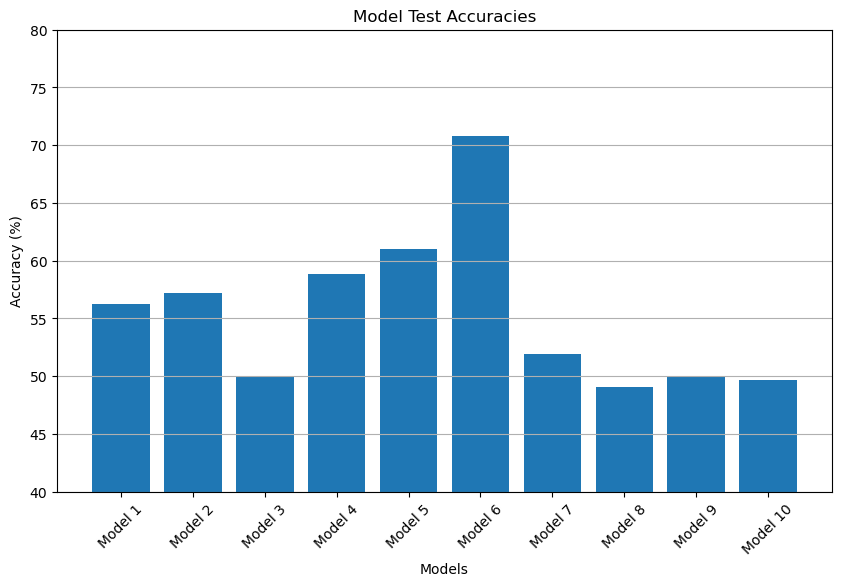

In [36]:
import matplotlib.pyplot as plt

# Model numbers
models = [f'Model {i}' for i in range(1, 11)]

# Corresponding accuracies (multiply by 100 if needed)
accuracies = [
    56.29,
    57.23,
    50.00,
    58.81,
    61.01,
    70.75,
    51.89,
    49.06,
    50.00,
    49.69
]

# Create bar plot
plt.figure(figsize=(10,6))
plt.bar(models, accuracies)
plt.title('Model Test Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(40, 80)  # Set y-axis limits for better visibility
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


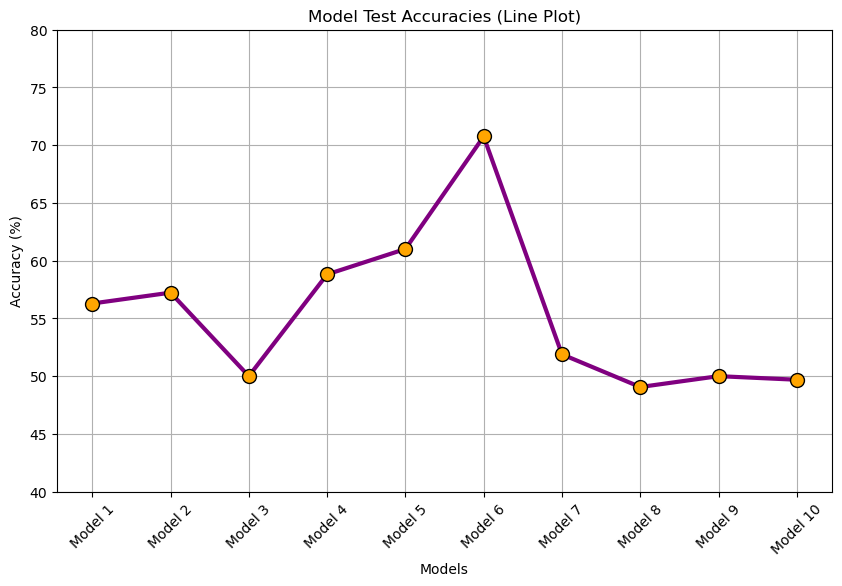

In [48]:
import matplotlib.pyplot as plt

# Model numbers
models = [f'Model {i}' for i in range(1, 11)]

# Corresponding accuracies
accuracies = [
    56.29,
    57.23,
    50.00,
    58.81,
    61.01,
    70.75,
    51.89,
    49.06,
    50.00,
    49.69
]

# Create line plot
plt.figure(figsize=(10,6))
plt.plot(models, accuracies, color='purple', linestyle='-', linewidth=3, marker='o',markersize=10, markerfacecolor='orange', markeredgecolor='black')
plt.title('Model Test Accuracies (Line Plot)')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(40, 80)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


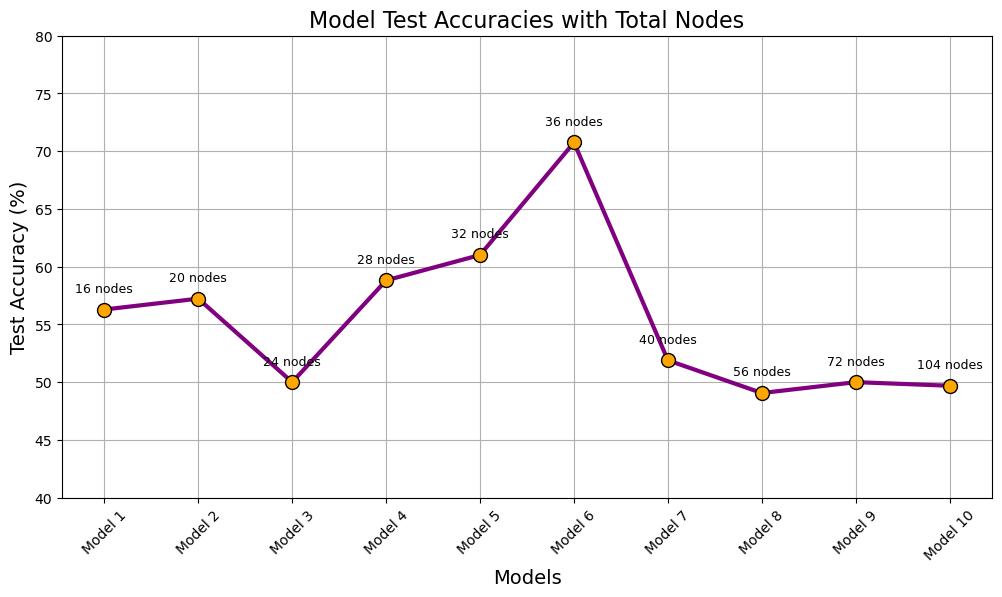

In [8]:
import matplotlib.pyplot as plt

# Model names (x-axis)
models = [f'Model {i}' for i in range(1, 11)]

# Test Accuracies (%)
accuracies = [
    56.29,
    57.23,
    50.00,
    58.81,
    61.01,
    70.75,
    51.89,
    49.06,
    50.00,
    49.69
]

# Total nodes for each model
total_nodes = [16, 20, 24, 28, 32, 36, 40, 56, 72, 104]

# Create the line plot
plt.figure(figsize=(12,6))
plt.plot(models, accuracies, color='purple', linestyle='-', linewidth=3,
         marker='o', markersize=10, markerfacecolor='orange', markeredgecolor='black')

# Label each point with its total node count
for i, nodes in enumerate(total_nodes):
    plt.annotate(f'{nodes} nodes', (models[i], accuracies[i] + 1.5), ha='center', fontsize=9)

plt.title('Model Test Accuracies with Total Nodes', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Test Accuracy (%)', fontsize=14)
plt.ylim(40, 80)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Visualization: Bar Chart Comparing Baseline vs Best Model

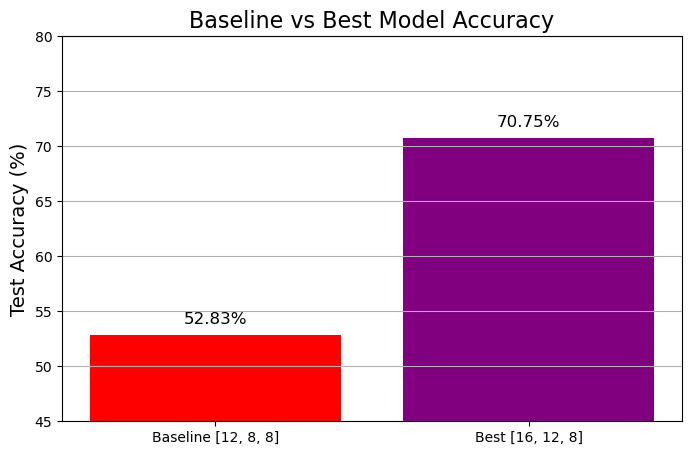

In [18]:
import matplotlib.pyplot as plt

# Updated model labels and accuracies
model_labels = ['Baseline [12, 8, 8]', 'Best [16, 12, 8]']
accuracies = [52.83, 70.75]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_labels, accuracies, color=['red', 'purple'])

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', fontsize=12)

plt.ylim(45, 80)
plt.title('Baseline vs Best Model Accuracy', fontsize=16)
plt.ylabel('Test Accuracy (%)', fontsize=14)
plt.grid(axis='y')
plt.show()


## Accuracy Summary and Interpretation

The visualizations show the test accuracies of 10 different neural network architectures, each with three hidden layers and varying numbers of nodes.

From the results, we observe the following:

- **Model 6** (architecture `[16, 12, 8]`) achieved the **highest test accuracy of 70.75%**, outperforming both smaller and larger architectures.
- Smaller models like **Model 1** (`[4, 4, 8]`) and **Model 2** (`[8, 4, 8]`) achieved moderate accuracy (56–57%), showing that minimal configurations can still perform reasonably.
- Interestingly, **larger architectures** (e.g., `[32, 16, 8]`, `[64, 32, 8]`) did **not lead to better performance**. In fact, these models suffered from **overfitting**, resulting in lower accuracy on test data (around 49–50%).
- This pattern confirms that adding more layers or nodes does not always improve model performance. It can increase complexity without improving generalization, especially with smaller datasets.

Overall, these results emphasize the importance of **systematic model tuning**. Starting with smaller models and incrementally adjusting architecture allowed us to identify an optimal balance between complexity and performance.


Credit: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/